In [19]:
import cobra
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from pandas import DataFrame
import plotly
import plotly.express as px
import plotly.graph_objs as go
import sklearn
import seaborn as sns
import scipy as sp

In [20]:
f = pd.read_csv(r'/Users/kmeeson/Downloads/CRISPR_gene_dependency.csv')
f

,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000001,0.094568,0.012519,0.027460,0.025962,0.073412,0.027340,0.020199,0.284733,0.022084,...,0.037449,0.080585,0.034309,0.007142,0.004241,0.082956,0.012000,0.003592,0.012679,0.324623
1,ACH-000004,0.012676,0.049011,0.075933,0.033215,0.013176,0.097497,0.005015,0.153166,0.007358,...,0.038768,0.230569,0.007125,0.021209,0.011203,0.060266,0.128375,0.005911,0.004645,0.042530
2,ACH-000005,0.053957,0.027968,0.010139,0.005448,0.018599,0.081636,0.005457,0.159904,0.050884,...,0.017479,0.274568,0.054525,0.033396,0.033416,0.034712,0.092832,0.012482,0.020843,0.050412
3,ACH-000007,0.026704,0.083588,0.008853,0.011299,0.027288,0.028349,0.032573,0.166503,0.047045,...,0.196233,0.615338,0.011212,0.002200,0.005432,0.035241,0.138445,0.103161,0.146222,0.274833
4,ACH-000009,0.059383,0.051826,0.015370,0.011721,0.030062,0.078373,0.042128,0.184783,0.032335,...,0.152385,0.405712,0.029011,0.002816,0.056461,0.189550,0.328064,0.035161,0.058402,0.269194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,ACH-002834,0.012720,0.083840,0.013308,0.013315,0.107286,0.079063,0.013340,0.717478,0.040061,...,0.027170,0.636352,0.022403,0.052849,0.029567,0.029711,0.024132,0.174946,0.091510,0.421153
1082,ACH-002847,0.058547,0.079576,0.036707,0.030234,0.069976,0.032828,0.012784,0.476383,0.096910,...,0.476423,0.967625,0.014249,0.018715,0.010776,0.072452,0.131375,0.115486,0.094022,0.438092
1083,ACH-002874,0.169875,0.017430,0.017965,0.008615,0.117915,0.075693,0.087961,0.144152,0.140377,...,0.710398,0.747477,0.045149,0.044243,0.017923,0.077515,0.094231,0.166188,0.058117,0.302708
1084,ACH-002875,0.035519,0.099789,0.071748,0.048479,0.245413,0.154663,0.045155,0.324723,0.089083,...,0.329219,0.168367,0.055878,0.039710,0.017571,0.101216,0.087739,0.050947,0.182081,0.349872


In [21]:
oc_ids = ['ACH-000520','ACH-000542','ACH-000091','ACH-000713','ACH-000256','ACH-000116']
#59m, heya8, ov56, caov3, cov318, oaw28
indexes_to_remove = []
for n in range(len(f)):
    if f.iloc[n,0] not in oc_ids:
        indexes_to_remove.append(n)
f_2 = f.drop(f.index[indexes_to_remove])
f_2

,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
62,ACH-000116,0.009740,0.118181,0.052278,0.005124,0.034051,0.055238,0.009203,0.300745,0.017164,...,0.204094,0.776858,0.029910,0.051818,0.012775,0.020100,0.135621,0.011016,0.092030,0.453578
148,ACH-000256,0.138922,0.022070,0.018532,0.053145,0.024841,0.034350,0.001590,0.422603,0.054672,...,0.169871,0.757895,0.084996,0.020230,0.000781,0.013533,0.010321,0.021971,0.006167,0.449270
334,ACH-000520,0.167370,0.040641,0.008150,0.006143,0.060948,0.056582,0.006833,0.190486,0.021255,...,0.432195,0.795119,0.077896,0.173668,0.048040,0.083450,0.210538,0.161016,0.054267,0.094941
346,ACH-000542,0.077545,0.030802,0.022475,0.027509,0.040512,0.029159,0.125693,0.679893,0.100139,...,0.543757,0.644974,0.016062,0.013627,0.036028,0.032089,0.217080,0.068786,0.109258,0.514024
460,ACH-000713,0.056964,0.012344,0.005115,0.007754,0.017439,0.030139,0.072870,0.081048,0.020171,...,0.161708,0.521575,0.006034,0.010050,0.026967,0.067992,0.097278,0.041282,0.024393,0.194550


In [22]:
oc_names = ['oaw28','cov318','59m','heya8','caov3']
f_2['cell_lines'] = oc_names
f_3 = f_2.transpose()
f_4 = f_3[1:]
f_4

,62,148,334,346,460
A1BG (1),0.00974,0.138922,0.16737,0.077545,0.056964
A1CF (29974),0.118181,0.02207,0.040641,0.030802,0.012344
A2M (2),0.052278,0.018532,0.00815,0.022475,0.005115
A2ML1 (144568),0.005124,0.053145,0.006143,0.027509,0.007754
A3GALT2 (127550),0.034051,0.024841,0.060948,0.040512,0.017439
...,...,...,...,...,...
ZYG11B (79699),0.135621,0.010321,0.210538,0.21708,0.097278
ZYX (7791),0.011016,0.021971,0.161016,0.068786,0.041282
ZZEF1 (23140),0.09203,0.006167,0.054267,0.109258,0.024393
ZZZ3 (26009),0.453578,0.44927,0.094941,0.514024,0.19455


In [23]:
genes = (f_4.index).to_list()

In [24]:
gene_names = []
for n in range(len(genes)):
    gene_names.append((genes[n].split())[0])
gene_names

['A1BG',
 'A1CF',
 'A2M',
 'A2ML1',
 'A3GALT2',
 'A4GALT',
 'A4GNT',
 'AAAS',
 'AACS',
 'AADAC',
 'AADACL2',
 'AADACL3',
 'AADACL4',
 'AADAT',
 'AAGAB',
 'AAK1',
 'AAMDC',
 'AAMP',
 'AANAT',
 'AAR2',
 'AARD',
 'AARS1',
 'AARS2',
 'AARSD1',
 'AASDH',
 'AASDHPPT',
 'AASS',
 'AATF',
 'AATK',
 'ABAT',
 'ABCA1',
 'ABCA10',
 'ABCA12',
 'ABCA13',
 'ABCA2',
 'ABCA3',
 'ABCA4',
 'ABCA5',
 'ABCA6',
 'ABCA7',
 'ABCA8',
 'ABCA9',
 'ABCB1',
 'ABCB10',
 'ABCB11',
 'ABCB4',
 'ABCB5',
 'ABCB6',
 'ABCB7',
 'ABCB8',
 'ABCB9',
 'ABCC1',
 'ABCC10',
 'ABCC11',
 'ABCC12',
 'ABCC2',
 'ABCC3',
 'ABCC4',
 'ABCC5',
 'ABCC6',
 'ABCC8',
 'ABCC9',
 'ABCD1',
 'ABCD2',
 'ABCD3',
 'ABCD4',
 'ABCE1',
 'ABCF1',
 'ABCF2',
 'ABCF3',
 'ABCG1',
 'ABCG2',
 'ABCG4',
 'ABCG5',
 'ABCG8',
 'ABHD1',
 'ABHD10',
 'ABHD11',
 'ABHD12',
 'ABHD12B',
 'ABHD13',
 'ABHD14A',
 'ABHD14B',
 'ABHD15',
 'ABHD16A',
 'ABHD16B',
 'ABHD17A',
 'ABHD17B',
 'ABHD17C',
 'ABHD18',
 'ABHD2',
 'ABHD3',
 'ABHD4',
 'ABHD5',
 'ABHD6',
 'ABHD8',
 'ABI1',
 '

In [25]:
f_4['genes'] = gene_names
f_4

/var/folders/5c/xx9bql4j4s9c930jy0hsxb1rnlqn5f/T/ipykernel_3684/2880764321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_4['genes'] = gene_names


,62,148,334,346,460,genes
A1BG (1),0.00974,0.138922,0.16737,0.077545,0.056964,A1BG
A1CF (29974),0.118181,0.02207,0.040641,0.030802,0.012344,A1CF
A2M (2),0.052278,0.018532,0.00815,0.022475,0.005115,A2M
A2ML1 (144568),0.005124,0.053145,0.006143,0.027509,0.007754,A2ML1
A3GALT2 (127550),0.034051,0.024841,0.060948,0.040512,0.017439,A3GALT2
...,...,...,...,...,...,...
ZYG11B (79699),0.135621,0.010321,0.210538,0.21708,0.097278,ZYG11B
ZYX (7791),0.011016,0.021971,0.161016,0.068786,0.041282,ZYX
ZZEF1 (23140),0.09203,0.006167,0.054267,0.109258,0.024393,ZZEF1
ZZZ3 (26009),0.453578,0.44927,0.094941,0.514024,0.19455,ZZZ3


In [26]:
_59m_d_scores = f_4.iloc[:17386,2]
heya8_d_scores = f_4.iloc[:17386,3]
caov3_d_scores = f_4.iloc[:17386,4]
cov318_d_scores = f_4.iloc[:17386,1]
oaw28_d_scores = f_4.iloc[:17386,0]
gene_names_2 = gene_names[:17386]

In [27]:
d = pd.DataFrame()
d['_59m_d'] = _59m_d_scores
d['heya8_d'] = heya8_d_scores
d['caov3'] = caov3_d_scores
d['cov318_d'] = cov318_d_scores
d['oaw28_d'] = oaw28_d_scores
d['genes'] = gene_names_2
d = d.set_index('genes')
d

,_59m_d,heya8_d,caov3,cov318_d,oaw28_d
genes,,,,,
A1BG,0.16737,0.077545,0.056964,0.138922,0.00974
A1CF,0.040641,0.030802,0.012344,0.02207,0.118181
A2M,0.00815,0.022475,0.005115,0.018532,0.052278
A2ML1,0.006143,0.027509,0.007754,0.053145,0.005124
A3GALT2,0.060948,0.040512,0.017439,0.024841,0.034051
...,...,...,...,...,...
ZYG11A,0.08345,0.032089,0.067992,0.013533,0.0201
ZYG11B,0.210538,0.21708,0.097278,0.010321,0.135621
ZYX,0.161016,0.068786,0.041282,0.021971,0.011016


In [90]:
d.to_csv('CCLE_low_high_grade_dependencies.csv')

In [15]:
from cobra.io import read_sbml_model
from mewpy.simulation import get_simulator
from mewpy.simulation import set_default_solver
set_default_solver('gurobi')

In [12]:
%store -r ov56_260923_model
%store -r caov3_260923_model
%store -r cov318_260923_model
%store -r oaw28_260923_model
%store -r heya8_260923_model
%store -r _59m_260923_model

no stored variable or alias ov56_270923_model
Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-24
Read LP format model from file /var/folders/5c/xx9bql4j4s9c930jy0hsxb1rnlqn5f/T/tmp6066ci59.lp
Reading time = 0.09 seconds
: 8400 rows, 26192 columns, 111634 nonzeros
Read LP format model from file /var/folders/5c/xx9bql4j4s9c930jy0hsxb1rnlqn5f/T/tmpobig438f.lp
Reading time = 0.08 seconds
: 8400 rows, 26192 columns, 111634 nonzeros
Read LP format model from file /var/folders/5c/xx9bql4j4s9c930jy0hsxb1rnlqn5f/T/tmpcggz94vx.lp
Reading time = 0.07 seconds
: 8400 rows, 26192 columns, 111634 nonzeros
Read LP format model from file /var/folders/5c/xx9bql4j4s9c930jy0hsxb1rnlqn5f/T/tmpjo9otaiw.lp
Reading time = 0.07 seconds
: 8400 rows, 26192 columns, 111634 nonzeros
Read LP format model from file /var/folders/5c/xx9bql4j4s9c930jy0hsxb1rnlqn5f/T/tmpz0oj_mh_.lp
Reading time = 0.08 seconds
: 8400 rows, 26192 columns, 111634 nonzeros


In [42]:
%store -r _59m_deletion_results
%store -r heya8_deletion_results
%store -r caov3_deletion_results
%store -r cov318_deletion_results
%store -r oaw28_deletion_results
%store -r ov56_deletion_results

In [43]:
simulation = get_simulator(ov56_260923_model)
result = simulation.simulate()
ov56_optimal = result.fluxes['biomass_human']

ov56_ratios = []
for n in range(len(ov56_deletion_results)):
    ov56_ratios.append(ov56_deletion_results.iloc[n,1]/ov56_optimal)
ov56_deletion_results['ratio'] =ov56_ratios

In [89]:
simulation = get_simulator(_59m_260923_model)
result = simulation.simulate()
_59m_optimal = result.fluxes['biomass_human']

_59m_ratios = []
for n in range(len(_59m_deletion_results)):
    _59m_ratios.append(_59m_deletion_results.iloc[n,1]/_59m_optimal)
_59m_deletion_results['ratio'] = _59m_ratios

simulation = get_simulator(heya8_260923_model)
result = simulation.simulate()
heya8_optimal = result.fluxes['biomass_human']

heya8_ratios = []
for n in range(len(heya8_deletion_results)):
    heya8_ratios.append(heya8_deletion_results.iloc[n,1]/heya8_optimal)
heya8_deletion_results['ratio'] =heya8_ratios

simulation = get_simulator(caov3_260923_model)
result = simulation.simulate()
caov3_optimal = result.fluxes['biomass_human']

caov3_ratios = []
for n in range(len(caov3_deletion_results)):
    caov3_ratios.append(caov3_deletion_results.iloc[n,1]/caov3_optimal)
caov3_deletion_results['ratio'] =caov3_ratios

simulation = get_simulator(cov318_260923_model)
result = simulation.simulate()
cov318_optimal = result.fluxes['biomass_human']

cov318_ratios = []
for n in range(len(cov318_deletion_results)):
    cov318_ratios.append(cov318_deletion_results.iloc[n,1]/cov318_optimal)
cov318_deletion_results['ratio'] =cov318_ratios

simulation = get_simulator(oaw28_260923_model)
result = simulation.simulate()
oaw28_optimal = result.fluxes['biomass_human']

oaw28_ratios = []
for n in range(len(oaw28_deletion_results)):
    oaw28_ratios.append(oaw28_deletion_results.iloc[n,1]/oaw28_optimal)
oaw28_deletion_results['ratio'] =oaw28_ratios

In [34]:
for n in range(len(_59m_deletion_results)):
    if 0 < _59m_deletion_results.iloc[n,1] < 0.02655:
        print(_59m_deletion_results.iloc[n,0],_59m_deletion_results.iloc[n,1])

{'ENSG00000004779'} 0.021927915624175922
{'ENSG00000165475'} 0.026544634565113984
{'ENSG00000109576'} 0.024410436868618744
{'ENSG00000140905'} 0.0258142357002676
{'ENSG00000178127'} 0.021927915363442088
{'ENSG00000145494'} 0.02192791536338551
{'ENSG00000178445'} 0.0258142354567731
{'ENSG00000179761'} 0.026411083870383326
{'ENSG00000150768'} 0.026204702203842724
{'ENSG00000140990'} 0.02192791564417998
{'ENSG00000198840'} 0.021927915643821353
{'ENSG00000131495'} 0.021927915644237624
{'ENSG00000198888'} 0.021927915644239016
{'ENSG00000110955'} 0.023063266013777783
{'ENSG00000212907'} 0.021927915230061174
{'ENSG00000124172'} 0.023063266433201574
{'ENSG00000198899'} 0.023063266313436873
{'ENSG00000065154'} 0.026503539829743246
{'ENSG00000120329'} 0.026540888982916296
{'ENSG00000160282'} 0.026493574318395777
{'ENSG00000213619'} 0.02192791536773938
{'ENSG00000147813'} 0.026547016377917648
{'ENSG00000090266'} 0.021927915303197373
{'ENSG00000173915'} 0.02306326640843589
{'ENSG00000147684'} 0.02

In [44]:
#can scan through for effect of individual KOs by using gene names
e = 'ENSG00000111669'
for n in range(len(_59m_deletion_results)):
    if e in _59m_deletion_results.iloc[n,0]:
        print('59m',_59m_deletion_results.iloc[n,0],_59m_deletion_results.iloc[n,1],_59m_deletion_results.iloc[n,3])
for n in range(len(heya8_deletion_results)):    
    if e in heya8_deletion_results.iloc[n,0]:
        print('heya8',heya8_deletion_results.iloc[n,0],heya8_deletion_results.iloc[n,1],heya8_deletion_results.iloc[n,3])
for n in range(len(oaw28_deletion_results)):    
    if e in oaw28_deletion_results.iloc[n,0]:
        print('oaw28',oaw28_deletion_results.iloc[n,0],oaw28_deletion_results.iloc[n,1],oaw28_deletion_results.iloc[n,3])
for n in range(len(cov318_deletion_results)):    
    if e in cov318_deletion_results.iloc[n,0]:
        print('cov318',cov318_deletion_results.iloc[n,0],cov318_deletion_results.iloc[n,1],cov318_deletion_results.iloc[n,3])
for n in range(len(caov3_deletion_results)):    
    if e in caov3_deletion_results.iloc[n,0]:
        print('cov318',caov3_deletion_results.iloc[n,0],caov3_deletion_results.iloc[n,1],caov3_deletion_results.iloc[n,3])
for n in range(len(ov56_deletion_results)):    
    if e in ov56_deletion_results.iloc[n,0]:
        print('ov56',ov56_deletion_results.iloc[n,0],ov56_deletion_results.iloc[n,1],ov56_deletion_results.iloc[n,3])       
    

59m {'ENSG00000111669'} 0.01815360215211385 0.6837369068012137
heya8 {'ENSG00000111669'} 0.05912656388438171 0.9337910237200936
oaw28 {'ENSG00000111669'} 0.01935326414325735 0.6863768691447253
cov318 {'ENSG00000111669'} 0.01729898732150417 0.7019504103035478
cov318 {'ENSG00000111669'} 0.016445107357837312 0.6363478041055188
ov56 {'ENSG00000111669'} 0.0382411847096475 0.9215529094752599


In [45]:
_59m_deletion_results.to_csv('_59m_deletion.csv')
heya8_deletion_results.to_csv('heya8_deletion.csv')
caov3_deletion_results.to_csv('caov3_deletion.csv')
cov318_deletion_results.to_csv('cov318_deletion.csv')
oaw28_deletion_results.to_csv('oaw28_deletion.csv')

In [56]:
ratios = pd.read_csv(r'/Users/kmeeson/Dropbox (The University of Manchester)/project_work_2023/Paper/ratios_and_cls_2.csv')
ratios = ratios.iloc[:,:7]
ratios #calcuated ratio of growth effect of KO in Excel

,name,gene,oaw28_ratio,cov318_ratio,caov3_ratio,heya8_ratio,_59m_ratio
0,DPM1,ENSG00000000419,1.0,1.0,1.000000e+00,1.0,1.0
1,FGR,ENSG00000000938,1.0,1.0,1.000000e+00,1.0,1.0
2,FUCA2,ENSG00000001036,1.0,1.0,1.000000e+00,1.0,1.0
3,GCLC,ENSG00000001084,0.0,0.0,0.000000e+00,0.0,0.0
4,CYP51A1,ENSG00000001630,0.0,0.0,-4.680000e-10,0.0,0.0
...,...,...,...,...,...,...,...
3623,CYP3A7-CYP3A51P,ENSG00000282301,1.0,1.0,1.000000e+00,1.0,1.0
3624,TOMT,ENSG00000284844,1.0,1.0,1.000000e+00,1.0,1.0
3625,None,ENSG00000285043,1.0,1.0,1.000000e+00,1.0,1.0
3626,None,ENSG00000285269,1.0,1.0,1.000000e+00,1.0,1.0


In [58]:
d['genes_2'] = (d.index).to_list()
ratio_names = (ratios['name']).to_list()

indexes_to_remove = []
for n in range(len(d)):
    if d.iloc[n,5] not in ratio_names:
        indexes_to_remove.append(n)
d_2 = d.drop(d.index[indexes_to_remove])
d_2_genes = (d_2.index).to_list()
d_2['genes_2'] = d_2_genes
d_3 = d_2.sort_values(by=['genes_2'])
d_3

,_59m_d,heya8_d,caov3,cov318_d,oaw28_d,genes_2
genes,,,,,,
A4GALT,0.056582,0.029159,0.030139,0.03435,0.055238,A4GALT
A4GNT,0.006833,0.125693,0.07287,0.00159,0.009203,A4GNT
AAAS,0.190486,0.679893,0.081048,0.422603,0.300745,AAAS
AACS,0.021255,0.100139,0.020171,0.054672,0.017164,AACS
AADAC,0.101225,0.040683,0.033298,0.00638,0.012087,AADAC
...,...,...,...,...,...,...
ZDHHC9,0.013235,0.011692,0.007559,0.009413,0.024621,ZDHHC9
ZMPSTE24,0.056743,0.021563,0.034661,0.01264,0.193766,ZMPSTE24
ZNRF1,0.021835,0.017466,0.00834,0.014268,0.005647,ZNRF1


In [59]:
d_3_genes = (d_3['genes_2']).to_list()

In [60]:
indexes_to_remove = []
for n in range(len(ratios)):
    if ratios.iloc[n,0] not in d_3_genes:
        indexes_to_remove.append(n)
ratios_2 = ratios.drop(ratios.index[indexes_to_remove])
ratios_3 = ratios_2.sort_values(by=['name'])
ratios_3

,name,gene,oaw28_ratio,cov318_ratio,caov3_ratio,heya8_ratio,_59m_ratio
1398,A4GALT,ENSG00000128274,1.0,1.0,1.0,1.0,1.0
1182,A4GNT,ENSG00000118017,1.0,1.0,1.0,1.0,1.0
522,AAAS,ENSG00000094914,0.0,0.0,0.0,0.0,0.0
412,AACS,ENSG00000081760,1.0,1.0,1.0,1.0,1.0
1067,AADAC,ENSG00000114771,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
3244,ZDHHC9,ENSG00000188706,1.0,1.0,1.0,1.0,1.0
428,ZMPSTE24,ENSG00000084073,1.0,1.0,1.0,1.0,1.0
3190,ZNRF1,ENSG00000186187,1.0,1.0,1.0,1.0,1.0
3033,ZNRF2,ENSG00000180233,1.0,1.0,1.0,1.0,1.0


In [65]:
d_and_r = pd.DataFrame()
d_and_r['gene'] = (ratios_3['name']).to_list()
d_and_r['59m_model_ratio'] = (ratios_3['_59m_ratio']).to_list()
d_and_r['59m_ccle_score'] = (d_3['_59m_d']).to_list()
d_and_r['heya8_model_ratio'] = (ratios_3['heya8_ratio']).to_list()
d_and_r['heya8_ccle_score'] = (d_3['heya8_d']).to_list()
d_and_r['caov3_model_ratio'] = (ratios_3['caov3_ratio']).to_list()
d_and_r['caov3_ccle_score'] = (d_3['caov3']).to_list()
d_and_r['cov318_model_ratio'] = (ratios_3['cov318_ratio']).to_list()
d_and_r['cov318_ccle_score'] = (d_3['cov318_d']).to_list()
d_and_r['oaw28_model_ratio'] = (ratios_3['oaw28_ratio']).to_list()
d_and_r['oaw28_ccle_score'] = (d_3['oaw28_d']).to_list()
d_and_r

,gene,59m_model_ratio,59m_ccle_score,heya8_model_ratio,heya8_ccle_score,caov3_model_ratio,caov3_ccle_score,cov318_model_ratio,cov318_ccle_score,oaw28_model_ratio,oaw28_ccle_score
0,A4GALT,1.0,0.056582,1.0,0.029159,1.0,0.030139,1.0,0.034350,1.0,0.055238
1,A4GNT,1.0,0.006833,1.0,0.125693,1.0,0.072870,1.0,0.001590,1.0,0.009203
2,AAAS,0.0,0.190486,0.0,0.679893,0.0,0.081048,0.0,0.422603,0.0,0.300745
3,AACS,1.0,0.021255,1.0,0.100139,1.0,0.020171,1.0,0.054672,1.0,0.017164
4,AADAC,1.0,0.101225,1.0,0.040683,1.0,0.033298,1.0,0.006380,1.0,0.012087
...,...,...,...,...,...,...,...,...,...,...,...
3460,ZDHHC9,1.0,0.013235,1.0,0.011692,1.0,0.007559,1.0,0.009413,1.0,0.024621
3461,ZMPSTE24,1.0,0.056743,1.0,0.021563,1.0,0.034661,1.0,0.012640,1.0,0.193766
3462,ZNRF1,1.0,0.021835,1.0,0.017466,1.0,0.008340,1.0,0.014268,1.0,0.005647
3463,ZNRF2,1.0,0.080800,1.0,0.032591,1.0,0.266350,1.0,0.045959,1.0,0.067915


In [66]:
#again, can scan for individual KO effect, but this time using gene/protein name
for n in range(len(d_and_r['gene'])):
    if d_and_r.iloc[n,0] == 'TPI1':
        print(d_and_r.iloc[n,:])

gene                      TPI1
59m_model_ratio       0.683737
59m_ccle_score        0.979546
heya8_model_ratio     0.933791
heya8_ccle_score      0.999305
caov3_model_ratio     0.636348
caov3_ccle_score      0.906009
cov318_model_ratio     0.70195
cov318_ccle_score     0.896834
oaw28_model_ratio     0.686377
oaw28_ccle_score       0.95348
Name: 3190, dtype: object


In [ ]:
#make subset of non-one??

PearsonRResult(statistic=-0.3177694129139963, pvalue=3.826236407971505e-82)


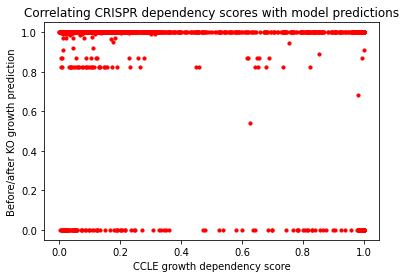

In [67]:
_59m_correlation_df = d_and_r.iloc[:,1:3]
dependency = _59m_correlation_df['59m_ccle_score']
simulation = _59m_correlation_df['59m_model_ratio']
print(sp.stats.pearsonr(dependency, simulation))
plt.scatter(dependency,simulation,color = 'red',s=10)
plt.xlabel('CCLE growth dependency score')
plt.ylabel('Before/after KO growth prediction')
plt.title('Correlating CRISPR dependency scores with model predictions')
plt.show()

PearsonRResult(statistic=-0.33466790564953736, pvalue=1.9117134749018957e-91)


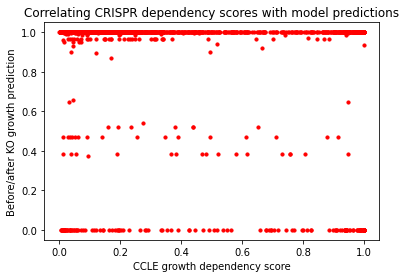

In [69]:
heya8_correlation_df = d_and_r.iloc[:,3:5]
dependency = heya8_correlation_df['heya8_ccle_score']
simulation = heya8_correlation_df['heya8_model_ratio']
print(sp.stats.pearsonr(dependency, simulation))
plt.scatter(dependency,simulation,color = 'red',s=10)
plt.xlabel('CCLE growth dependency score')
plt.ylabel('Before/after KO growth prediction')
plt.title('Correlating CRISPR dependency scores with model predictions')
plt.show()

PearsonRResult(statistic=-0.35506872910749254, pvalue=1.756101441065412e-103)


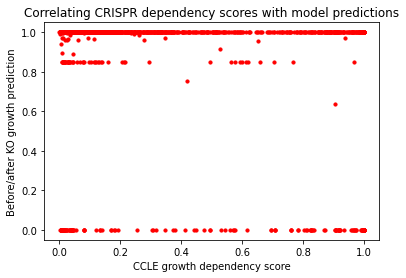

In [70]:
caov3_correlation_df = d_and_r.iloc[:,5:7]
dependency = caov3_correlation_df['caov3_ccle_score']
simulation = caov3_correlation_df['caov3_model_ratio']
print(sp.stats.pearsonr(dependency, simulation))
plt.scatter(dependency,simulation,color = 'red',s=10)
plt.xlabel('CCLE growth dependency score')
plt.ylabel('Before/after KO growth prediction')
plt.title('Correlating CRISPR dependency scores with model predictions')
plt.show()

PearsonRResult(statistic=-0.3209144795183017, pvalue=7.879041438678736e-84)


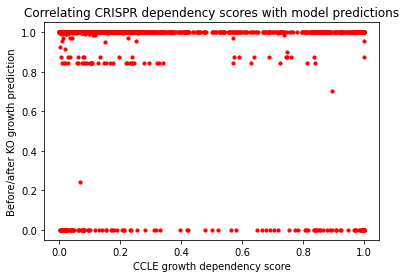

In [71]:
cov318_correlation_df = d_and_r.iloc[:,7:9]
dependency = cov318_correlation_df['cov318_ccle_score']
simulation = cov318_correlation_df['cov318_model_ratio']
print(sp.stats.pearsonr(dependency, simulation))
plt.scatter(dependency,simulation,color = 'red',s=10)
plt.xlabel('CCLE growth dependency score')
plt.ylabel('Before/after KO growth prediction')
plt.title('Correlating CRISPR dependency scores with model predictions')
plt.show()

PearsonRResult(statistic=-0.3152080011516717, pvalue=8.73339400705505e-81)


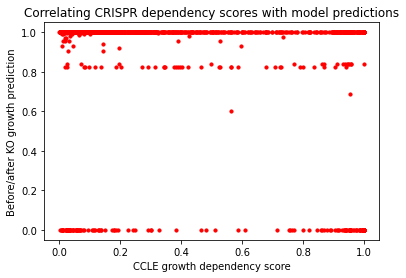

In [72]:
oaw28_correlation_df = d_and_r.iloc[:,9:]
dependency = oaw28_correlation_df['oaw28_ccle_score']
simulation = oaw28_correlation_df['oaw28_model_ratio']
print(sp.stats.pearsonr(dependency, simulation))
plt.scatter(dependency,simulation,color = 'red',s=10)
plt.xlabel('CCLE growth dependency score')
plt.ylabel('Before/after KO growth prediction')
plt.title('Correlating CRISPR dependency scores with model predictions')
plt.show()

In [83]:
indexes_to_remove = []
for n in range(len(d_and_r)):
    if d_and_r.iloc[n,1] == 1:
        indexes_to_remove.append(n)
    if d_and_r.iloc[n,1] > 1:
        indexes_to_remove.append(n)
_59m_essential = d_and_r.drop(d_and_r.index[indexes_to_remove])
_59m_essential_2 = _59m_essential.iloc[:,0:3]
print('59m',len(_59m_essential_2))

indexes_to_remove = []
for n in range(len(d_and_r)):
    if d_and_r.iloc[n,3] == 1:
        indexes_to_remove.append(n)
    if d_and_r.iloc[n,3] > 1:
        indexes_to_remove.append(n)
heya8_essential = d_and_r.drop(d_and_r.index[indexes_to_remove])
heya8_essential_2 = heya8_essential.iloc[:,3:5]
print('heya8',len(heya8_essential_2))

indexes_to_remove = []
for n in range(len(d_and_r)):
    if d_and_r.iloc[n,5] == 1:
        indexes_to_remove.append(n)
    if d_and_r.iloc[n,5] > 1:
        indexes_to_remove.append(n)
caov3_essential = d_and_r.drop(d_and_r.index[indexes_to_remove])
caov3_essential_2 = heya8_essential.iloc[:,5:7]
print('caov3',len(caov3_essential_2))

indexes_to_remove = []
for n in range(len(d_and_r)):
    if 0.99999 < d_and_r.iloc[n,7] < 1:
        indexes_to_remove.append(n)
    if d_and_r.iloc[n,7] > 1:
        indexes_to_remove.append(n)
cov318_essential = d_and_r.drop(d_and_r.index[indexes_to_remove])
cov318_essential_2 = cov318_essential.iloc[:,7:9]
print('cov318',len(cov318_essential_2))

indexes_to_remove = []
for n in range(len(d_and_r)):
    if 0.99999 < d_and_r.iloc[n,9] < 1:
        indexes_to_remove.append(n)
    if d_and_r.iloc[n,9] > 1:
        indexes_to_remove.append(n)
oaw28_essential = d_and_r.drop(d_and_r.index[indexes_to_remove])
oaw28_essential_2 = oaw28_essential.iloc[:,9:]
print('oaw28',len(oaw28_essential_2))

59m 263
heya8 305
caov3 305
cov318 391
oaw28 288


PearsonRResult(statistic=-0.4185405830184957, pvalue=1.4097505545508669e-12)


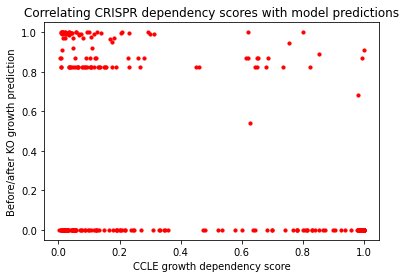

In [84]:
dependency = _59m_essential_2['59m_ccle_score']
simulation = _59m_essential_2['59m_model_ratio']
print(sp.stats.pearsonr(dependency, simulation))
plt.scatter(dependency,simulation,color = 'red',s=10)
plt.xlabel('CCLE growth dependency score')
plt.ylabel('Before/after KO growth prediction')
plt.title('Correlating CRISPR dependency scores with model predictions')
plt.show()

PearsonRResult(statistic=-0.4329475249959332, pvalue=2.2975624733821604e-15)


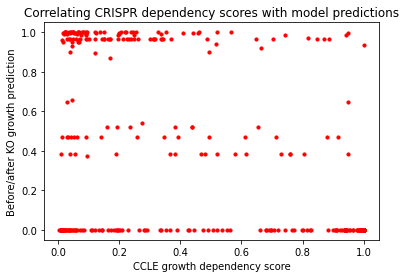

In [85]:
dependency = heya8_essential_2['heya8_ccle_score']
simulation = heya8_essential_2['heya8_model_ratio']
print(sp.stats.pearsonr(dependency, simulation))
plt.scatter(dependency,simulation,color = 'red',s=10)
plt.xlabel('CCLE growth dependency score')
plt.ylabel('Before/after KO growth prediction')
plt.title('Correlating CRISPR dependency scores with model predictions')
plt.show()

PearsonRResult(statistic=-0.46180485103069585, pvalue=1.6196400731142903e-17)


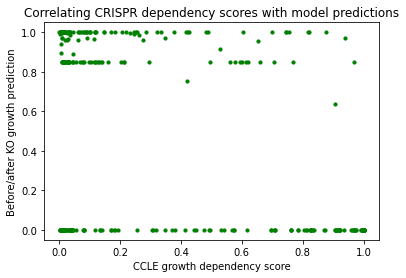

In [86]:
dependency = caov3_essential_2['caov3_ccle_score']
simulation = caov3_essential_2['caov3_model_ratio']
print(sp.stats.pearsonr(dependency, simulation))
plt.scatter(dependency,simulation,color = 'green',s=10)
plt.xlabel('CCLE growth dependency score')
plt.ylabel('Before/after KO growth prediction')
plt.title('Correlating CRISPR dependency scores with model predictions')
plt.show()

PearsonRResult(statistic=-0.44705367141621744, pvalue=1.3124694821350619e-20)


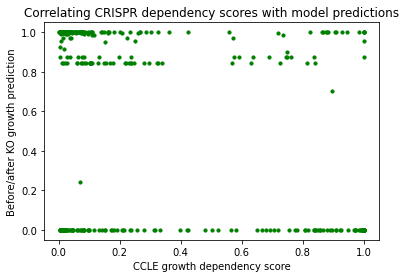

In [87]:
dependency = cov318_essential_2['cov318_ccle_score']
simulation = cov318_essential_2['cov318_model_ratio']
print(sp.stats.pearsonr(dependency, simulation))
plt.scatter(dependency,simulation,color = 'green',s=10)
plt.xlabel('CCLE growth dependency score')
plt.ylabel('Before/after KO growth prediction')
plt.title('Correlating CRISPR dependency scores with model predictions')
plt.show()

PearsonRResult(statistic=-0.34283352151396784, pvalue=2.3034484022937994e-09)


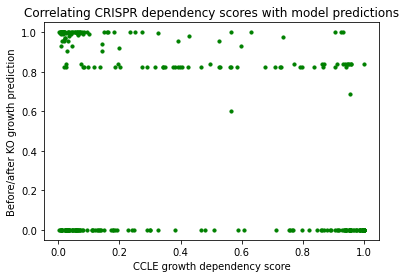

In [88]:
dependency = oaw28_essential_2['oaw28_ccle_score']
simulation = oaw28_essential_2['oaw28_model_ratio']
print(sp.stats.pearsonr(dependency, simulation))
plt.scatter(dependency,simulation,color = 'green',s=10)
plt.xlabel('CCLE growth dependency score')
plt.ylabel('Before/after KO growth prediction')
plt.title('Correlating CRISPR dependency scores with model predictions')
plt.show()